In [15]:
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,31)

xValues = []
yValues = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,iris.data,iris.target,cv=10)
    xValues.append(k)
    yValues.append(scores.mean())
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=2 ; mean accuracy=95.33%; standard deviation=5.21%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=4 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=6 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=8 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=10; mean accuracy=96.67%; standard deviation=4.47%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=12; mean accuracy=97.33%; standard deviation=3.27%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=14; mean accuracy=97.33%; standard deviation=4.42%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=16; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=18; mean accuracy=98.00%; standard deviation=3.06%
k=19; mean accuracy=97.33%; standard deviation

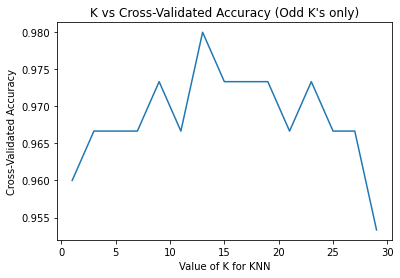

In [17]:
import matplotlib.pyplot as plt

plt.title("K vs Cross-Validated Accuracy (Odd K's only)")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

#here I used odd numbers only in order to avoid ties within the KNN algorithm
#setting k_range to step by 1 still results in k=13 being the best estimator
plt.plot(xValues[1::2], yValues[1::2])


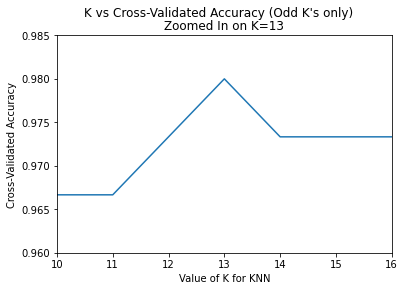

In [18]:
plt.suptitle("K vs Cross-Validated Accuracy (Odd K's only)")
plt.title("Zoomed In on K=13")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.axis([10,16, 0.96, 0.985])
plt.plot(xValues, yValues)

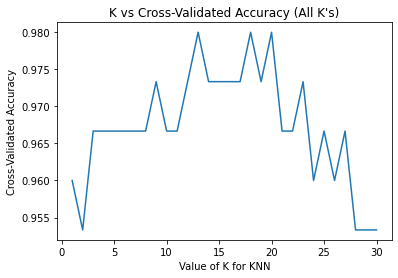

In [19]:
#for completion, here is the plot for all K values
plt.title("K vs Cross-Validated Accuracy (All K's)")
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.plot(xValues, yValues)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(iris.data,iris.target)

#this confirms the best_estimator is k=13
print(grid.best_estimator_)
print(f"Best accuracy: {grid.best_score_:.2%}")



KNeighborsClassifier(n_neighbors=13)
Best accuracy: 98.00%
